# Visualization of networks – analyzing and visualizing connections between (planned) NFDI consortia


The following uses the networkx package combined with matplotlib for a simple network graph and plotly for a bit of a fancier network graph. 

For more info, check out this [networkx tutorial](https://networkx.org/documentation/stable/tutorial.html).

First, install and import necessary python modules.

In [1]:
import sys
!{sys.executable} -m pip install plotly
!{sys.executable} -m pip install networkx
!{sys.executable} -m pip install pandas
!{sys.executable} -m pip install openpyxl
!{sys.executable} -m pip install scipy

Der Befehl "C:\Program" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.
Der Befehl "C:\Program" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.
Der Befehl "C:\Program" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.
Der Befehl "C:\Program" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.
Der Befehl "C:\Program" ist entweder falsch geschrieben oder
konnte nicht gefunden werden.


In [2]:
import plotly.graph_objects as go
import networkx as nx
import pandas as pd
import numpy as np
from itertools import count
import plotly.io as pio
from datetime import date
import matplotlib.pyplot as plt
import matplotlib as m
#import csv

## The Dataset for Edges
Get the data and enter into a dataframe. 

In [3]:
NFDI_edges = pd.read_csv("nfdi-collaborations.csv",
                 sep    = ",",
                 header = 0)

In [4]:
NFDI_edges.head()

,from,to
0,DataPLANT,NFDI4BioDiversity
1,DataPLANT,NFDI4Chem
2,GHGA,NFDI4Health
3,KonsortSWD,BERD@NFDI
4,KonsortSWD,NFDI4BioDiversity


Create the networkx graph object. We're using a directional graph here since this will result in arrows as edges and gives the option to curve the edges. Uncomment the regular `Graph` line below (and comment the `DiGraph` line) if you want to see what happens when we don't use a directional graph. 

In [54]:
# create networkx graph object
G = nx.DiGraph()
# G = nx.Graph()

In [55]:
# the nodes will just be a list of all NFDI consortia, which you can extract from the df

for header in NFDI_edges: # go through each column using the headers
    for consortia in NFDI_edges[header]: # go through each cosortia in each column 
        if consortia not in G.nodes: # if the consortia isn't yet in the nodes list ...
            G.add_node(consortia) # ... add it 

In [57]:
# create edges from dataframe
# networkx takes edges in the form of tuples, where each component is added separately
# alternatively, you could create a list of the tuples, then use the G.add_edges_from(list_of_tuples) to create edges (and there are probably many more solutions)

for index, row in NFDI_edges.iterrows(): # iterate through the rows of the dataframe
    edge = tuple(row) # create a tuple from the items in each row
    G.add_edge(edge[0], edge[1]) # add each component of the edge to the object

## First Plot - matplotlib

The first series of plots will be setup with matplotlib.

You may need to reset the plot size. For that you can just alter the code below.

In [59]:
plt.rcParams["figure.figsize"] = (10,10)
plt.rcParams["figure.autolayout"] = True

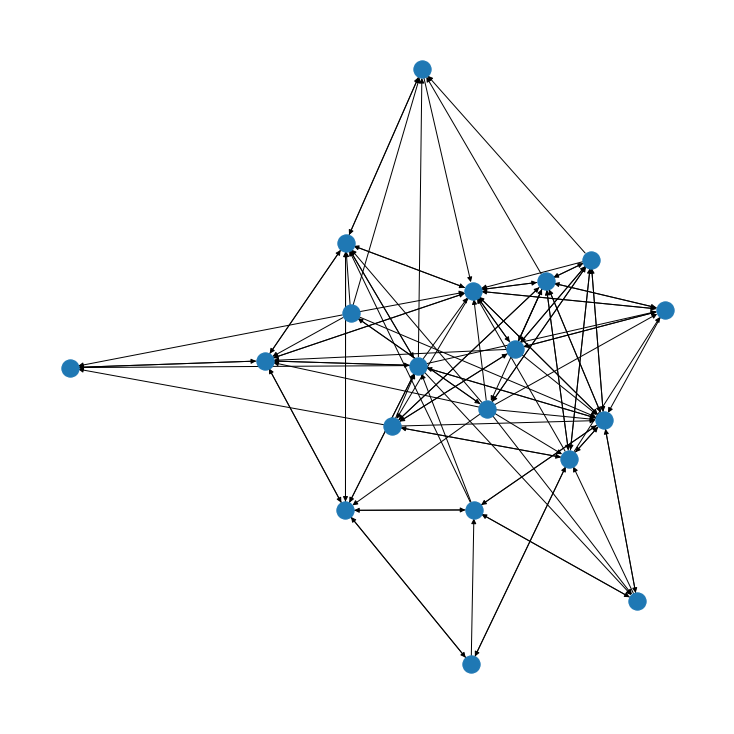

In [60]:
nx.draw(G)

Add a title, frame, and label the nodes.

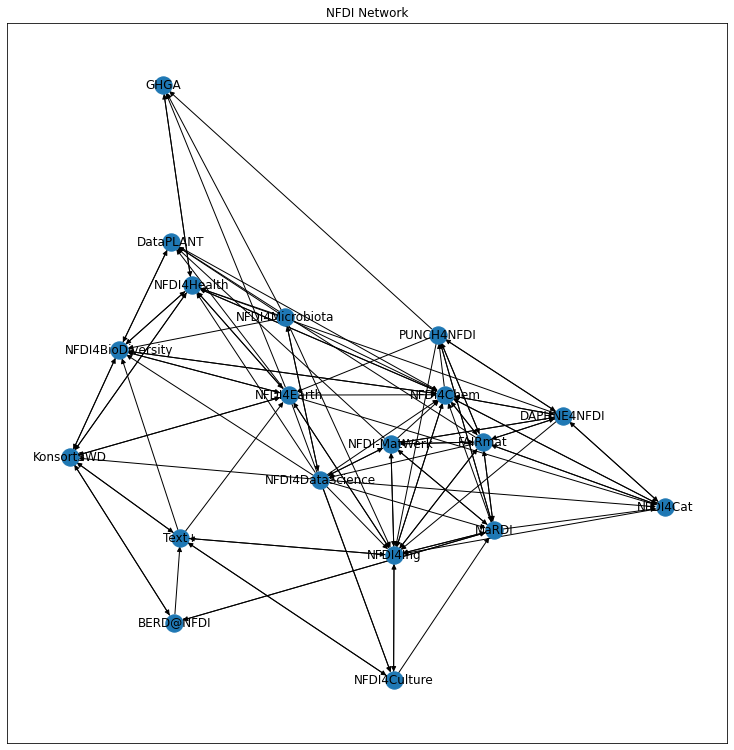

In [68]:
nx.draw(G, 
    with_labels=True, # label the nodes by consortium
    )

plt.axis('on') # turn frame on
plt.title("NFDI Network") # give it a title
plt.show()

### Layout
Fix the layout repeatability by specifying a seed number. The layout chosen here is the spring_layout and there are many more to chose from [here](https://networkx.org/documentation/stable/reference/drawing.html).

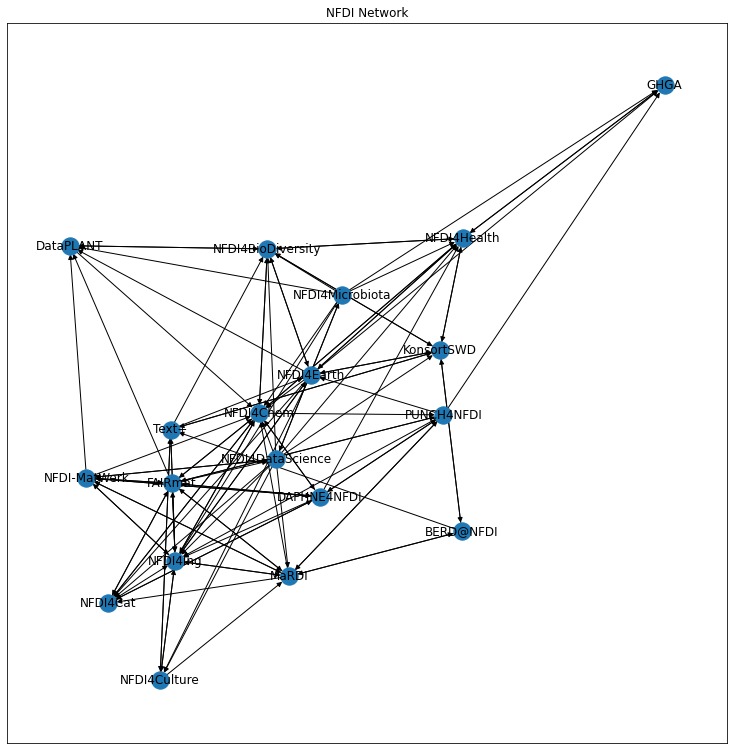

In [98]:
nx.draw(G, 
    with_labels=True, # label the nodes by consortia
    pos=nx.spring_layout(G, seed=3113794652), # layout repeatability
    )

plt.axis('on') # turn frame on
plt.title("NFDI Network") # give it a title
plt.show()

Curve the edges for better clarity.

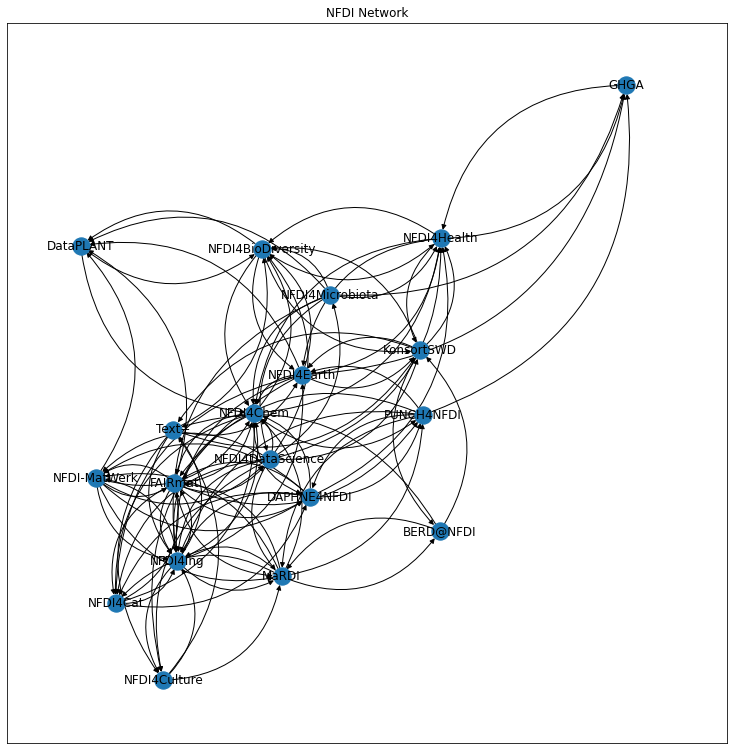

In [99]:
nx.draw(G, 
    with_labels=True, # label the nodes by consortia
    pos=nx.spring_layout(G, seed=3113794652), # layout repeatability
    connectionstyle="arc3,rad=0.4", # curve the edges
    
    )

plt.axis('on') # turn frame on
plt.title("NFDI Network") # give it a title
plt.show()

### Colors, font and node sizes, curvature
It's still a bit chaotic, let's try to clean it up some more (check the these [docs](https://networkx.org/documentation/stable/reference/generated/networkx.drawing.nx_pylab.draw_networkx_edges.html#networkx.drawing.nx_pylab.draw_networkx_edges)).

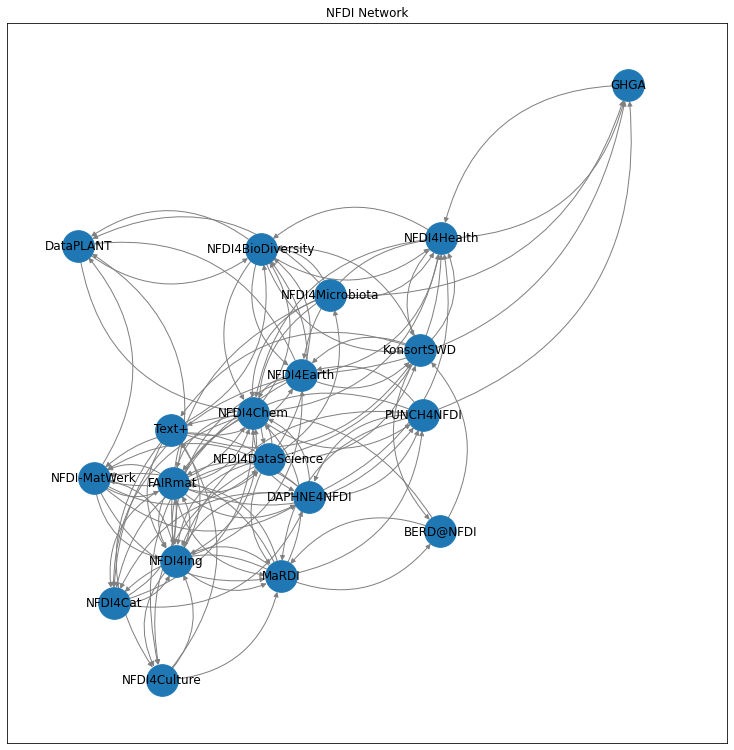

In [100]:
nx.draw(G, 
    with_labels=True,                           # label the nodes by consortia
    pos=nx.spring_layout(G, seed=3113794652),   # layout repeatability
    connectionstyle="arc3,rad=0.4",             # curve the edges
    edge_color='grey',                          # edge color
    arrowsize=10,                               # arrow head size
    node_size=1000                              # node size
    )

plt.axis('on') # turn frame on
plt.title("NFDI Network") # give it a title
plt.show()

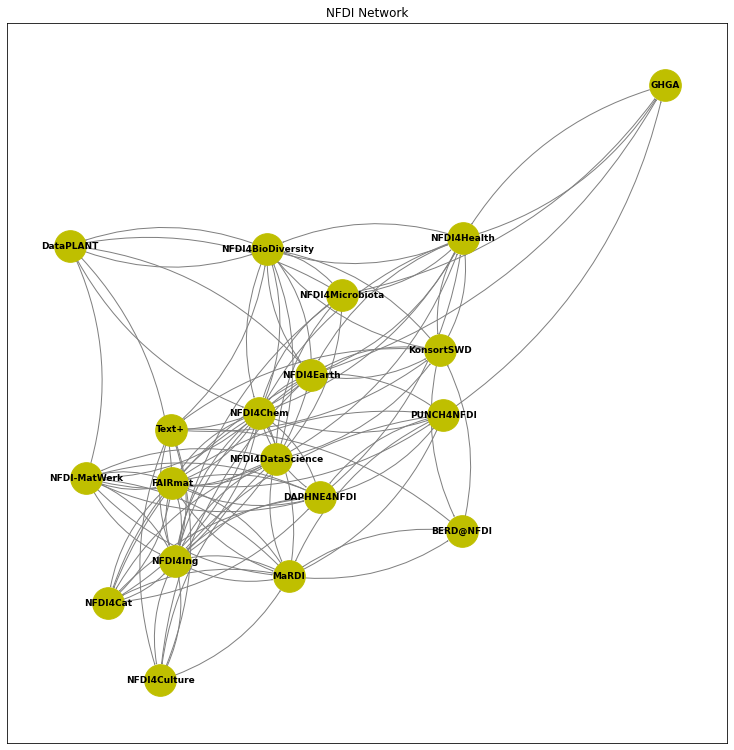

In [101]:
nx.draw(G, 
    with_labels=True,                         # label the nodes by consortia
    font_size=9,                              # label font size
    font_weight='bold',                       # font weight, default is 'normal'
    pos=nx.spring_layout(G, seed=3113794652), # layout repeatability
    connectionstyle="arc3,rad=0.2",           # curve the edges
    edge_color='grey',                        # edge color
    arrowsize=1,                              # arrow head size, 1 makes the arrowhead invisible, 0 would take away the entire edge
    node_size=1000,                           # node size
    node_color ='y'                           # node size
    )

plt.axis('on') # turn frame on
plt.title("NFDI Network") # give it a title
plt.show()

See [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.patches.ArrowStyle.html#matplotlib.patches.ArrowStyle) for `arrowstyle`.

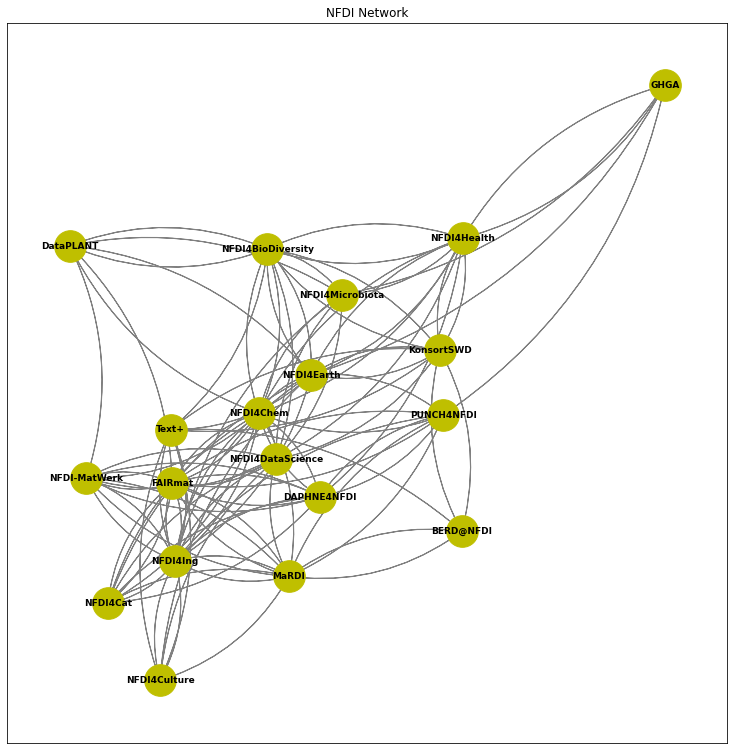

In [102]:
nx.draw(G, 
    with_labels=True,                         # label the nodes by consortia
    font_size=9,                              # label font size
    font_weight='bold',                       # font weight, default is 'normal'
    pos=nx.spring_layout(G, seed=3113794652), # layout repeatability
    connectionstyle="arc3,rad=0.2",           # curve the edges
    edge_color='grey',                        # edge color
    arrowsize=1,                              # arrow head size, 1 makes the arrowhead invisible, 0 would take away the entire edge
    arrowstyle='simple',                      # arrow stlye     
    node_size=1000,                           # node size
    node_color ='y'                           # node size
    )

#draw_networkx_labels(G, pos, labels=None, font_size=12, font_color='k', font_family='sans-serif', font_weight='normal', alpha=None, bbox=None, horizontalalignment='center', verticalalignment='center', ax=None, clip_on=True)

plt.axis('on') # turn frame on
plt.title("NFDI Network") # give it a title
plt.show()



## Second Plot - Plotly

This is a little more complicated, but it does give a cleaner and interactive graph. It uses the edges and nodes defind in the networkx object `G` above. The below code relies heavily on [this example](<https://plotly.com/python/network-graphs/>).

In [108]:
# set the node position, use the same as above
pos = nx.spring_layout(G, seed=3113794652) 

# get the edge info (x, y-pos) from the networkx object and add to lists
edge_x = []
edge_y = []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.append(x0)
    edge_x.append(x1)
    edge_x.append(None)
    edge_y.append(y0)
    edge_y.append(y1)
    edge_y.append(None)

#create the edge plots
edge_trace = go.Scatter(
    x=edge_x, y=edge_y,
    line=dict(width=0.5, color='#888'),
    hoverinfo='none',
    mode='lines')

# get the node information (x, y-pos) from the networkx object, add to lists
node_list = [] # for the nodes names, used in creating the labels 
node_x = []
node_y = []
for node in G.nodes():
    x, y = pos[node]
    node_x.append(x)
    node_y.append(y)
    node_list.append(node)
    
# get the node adjacencies (connections) for the node_text labels
node_adjacencies = []
node_text = []

for node, adjacencies in enumerate(G.adjacency()):
    if adjacencies[0] == list(adjacencies[1].keys())[0] and len(adjacencies[1]) == 1:
        node_adjacencies.append(0)
        node_text.append(node_list[node]+', # of connections: 0')
    elif adjacencies[0] in list(adjacencies[1].keys()):
        node_adjacencies.append(len(adjacencies[1])-1)
        node_text.append(node_list[node]+', # of connections: '+str(len(adjacencies[1])-1))
    else:
        node_adjacencies.append(len(adjacencies[1]))
        node_text.append(node_list[node]+', # of connections: '+str(len(adjacencies[1])))

# create the node plot
node_trace = go.Scatter(
    x=node_x, y=node_y,
    mode='markers',
    hoverinfo='text',
    marker=dict(
        showscale=True,
        # colorscale options
        #'Greys' | 'YlGnBu' | 'Greens' | 'YlOrRd' | 'Bluered' | 'RdBu' |
        #'Reds' | 'Blues' | 'Picnic' | 'Rainbow' | 'Portland' | 'Jet' |
        #'Hot' | 'Blackbody' | 'Earth' | 'Electric' | 'Viridis' |
        colorscale='YlOrRd',
        reversescale=False,
        color=[],
        size=10,
        
        colorbar=dict(
            thickness=15,
            title='Number of Consortia Connections',
            xanchor='left',
            titleside='right'
        ),
        line_width=2))

# color the nodes according to their number of connections
node_trace.marker.color = node_adjacencies

# set the label text
node_trace.text = node_text

#draw the plotly figure
fig = go.Figure(data=[edge_trace, node_trace],
             layout=go.Layout(
                autosize=False,
                width=750,
                height=750,
                plot_bgcolor='rgb(255, 255, 255)',
                title='NFDI Network',
                title_x=0.5, 
                titlefont_size=16,
                showlegend=False,
                hovermode='closest',
                margin=dict(b=20,l=5,r=5,t=40),
                annotations=[ dict(
                    text='Hover cursor over nodes for more info.',
                    showarrow=False,
                    xref="paper", yref="paper",
                    x=0.005, y=-0.002 ) ],
                xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
                yaxis=dict(showgrid=False, zeroline=False, showticklabels=False))
                )

fig.update_layout(
    autosize=False,
    width=550,
    height=550,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
   )

fig.show()

In [110]:
# save to an html file and use in website
pio.write_html(fig, file='NFDI_network_plotly.html', auto_open=True)